In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data.csv to data (5).csv
User uploaded file "data.csv" with length 29427 bytes


# **DATA Preprocessing**

In [0]:
df = pd.read_csv("data.csv", usecols=[0], parse_dates=True)
# 종로구가 아닌 다른 구를 예측하려면 usecols=[1, 2, 3, ... , 25]로 바꾸기
dataset = df.values

In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [0]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

**Normalized**

In [0]:
def create_dataset(dataset, look_back = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# **Modeling**

In [0]:
model = Sequential(name="LSTM_32dim")
model.add(LSTM(32, input_dim = look_back))
# model = Sequential(name="GRU_4dim")
# model.add(LGRU(32, input_dim = look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(32, input_shape=(None, 1))`
  


Model: "LSTM_32dim"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0350
Epoch 2/100
 - 0s - loss: 0.0195
Epoch 3/100
 - 0s - loss: 0.0146
Epoch 4/100
 - 0s - loss: 0.0138
Epoch 5/100
 - 0s - loss: 0.0134
Epoch 6/100
 - 0s - loss: 0.0128
Epoch 7/100
 - 0s - loss: 0.0124
Epoch 8/100
 - 0s - loss: 0.0118
Epoch 9/100
 - 0s - loss: 0.0113
Epoch 10/100
 - 0s - loss: 0.0109
Epoch 11/100
 - 0s - loss: 0.0106
Epoch 12/100
 - 0s - loss: 0.0102
Epoch 13/100
 - 0s - loss: 0.0100
Epoch 14/100
 - 0s - loss: 0.0097
Epoch 15/100
 - 0s - loss: 0.0095
Epoch 16/100
 - 0s - loss: 0.0093
Epoch 17/100
 - 0s - loss: 0.0091
Epoch 18/100
 - 0s - loss: 0.0090
Epoch 19/100
 - 0s - loss: 0.0089
Epoch 20/100
 - 0s - loss: 0.0088
Epoch 21/100
 - 0s - loss: 0.0087
Epoch 22/100
 - 0s - loss: 0.0087
Epoch 23/100
 - 0s - loss: 0.0086
Epoch 24/100
 - 0s - loss: 0.0085
Epoch 25/100
 - 0s - loss: 0.0086
Epoch 26/100
 - 0s - loss: 0.0085
Epoch 27/100
 - 0s - loss: 0.0086
Epoch 28/100
 - 0s - loss: 0.0086
Epoch 29/100
 - 0s - loss: 0.0088
Epoch 30/100
 - 0s - lo

# **Evaluation**

**Predict**

In [0]:
trainPred = model.predict(trainX)
testPred = model.predict(testX)

In [0]:
trainPred = scaler.inverse_transform(trainPred)
trainY = scaler.inverse_transform([trainY])
testPred = scaler.inverse_transform(testPred)
testY = scaler.inverse_transform([testY])

**RMSE Score**

In [0]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPred[:, 0]))
print("Train Score: %.2f RMSE" % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPred[:,0]))
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 1564.53 RMSE
Test Score: 2837.06 RMSE


**Prediction Graph**

In [0]:
trainPredPlot = np.empty_like(dataset)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(trainPred)+look_back, :] = trainPred

In [0]:
testPredPlot = np.empty_like(dataset)
testPredPlot[:, :] = np.nan
testPredPlot[len(trainPred)+(look_back*2)+1:len(dataset)-1, :] = testPred

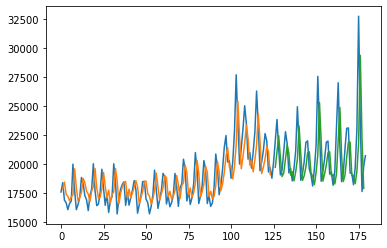

In [0]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.show()